In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('ООО_Внимание_к_деталям1.xlsx')

In [3]:
print(df.head())

    id точки                                              Адрес     Широта  \
0    42312.0  Красноярский край, г. Норильск, пл. Металлурго...  88.182779   
1    42458.0  Мурманская обл, г. Мурманск, ул. Ленина, дом №...  33.074807   
2    42447.0  Мурманская обл, г. Мурманск, пр. Ленина, дом № 32  33.067489   
3  2633929.0  Ямало-Ненецкий АО, г. Новый Уренгой, ул. Сибир...  76.631279   
4    15621.0  Архангельская обл, г. Северодвинск, ул. Ломоно...  39.785522   

     Долгота Дата открытия Дата закрытия  Площадь магазина  \
0  69.358932    2013-07-15           NaT               455   
1  68.968507    2006-11-21           NaT               223   
2  68.956872    2012-11-09           NaT               602   
3  66.082833    2014-08-01           NaT               326   
4  64.550364    2003-11-09           NaT               178   

               Тип входа  Площадь ТЦ Формат магазина  ... Этаж  \
0  без сквозного прохода     28324.0              ТЦ  ...    1   
1  без сквозного прохода  

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id точки             245 non-null    float64       
 1   Адрес                246 non-null    object        
 2   Широта               246 non-null    float64       
 3   Долгота              246 non-null    float64       
 4   Дата открытия        246 non-null    datetime64[ns]
 5   Дата закрытия        9 non-null      datetime64[ns]
 6   Площадь магазина     246 non-null    int64         
 7   Тип входа            244 non-null    object        
 8   Площадь ТЦ           204 non-null    float64       
 9   Формат магазина      246 non-null    object        
 10  Парковка             228 non-null    object        
 11  Этаж                 241 non-null    object        
 12  Время работы         240 non-null    object        
 13  Заполненность ТЦ     182 non-null  

In [5]:
df.columns

Index(['id точки', 'Адрес', 'Широта', 'Долгота', 'Дата открытия',
       'Дата закрытия', 'Площадь магазина', 'Тип входа', 'Площадь ТЦ',
       'Формат магазина', 'Парковка', 'Этаж', 'Время работы',
       'Заполненность ТЦ', 'Рядом с эскалатором', 'Рядом со входом',
       'Конкуренты в ТЦ', 'Расположение в ТЦ', 'Толока', 'Люкс', 'Выборка'],
      dtype='object')

In [6]:
df1 = df.rename(columns = {'Широта':'Долгота','Долгота':'Широта'})

In [7]:
print(df1)

      id точки                                              Адрес     Долгота  \
0      42312.0  Красноярский край, г. Норильск, пл. Металлурго...   88.182779   
1      42458.0  Мурманская обл, г. Мурманск, ул. Ленина, дом №...   33.074807   
2      42447.0  Мурманская обл, г. Мурманск, пр. Ленина, дом № 32   33.067489   
3    2633929.0  Ямало-Ненецкий АО, г. Новый Уренгой, ул. Сибир...   76.631279   
4      15621.0  Архангельская обл, г. Северодвинск, ул. Ломоно...   39.785522   
..         ...                                                ...         ...   
241    42553.0  Респ. Кабардино-Балкария, г. Нальчик, ул. Лени...   43.608527   
242    42240.0  Краснодарский край, Адлерский р-он, г. Сочи, у...   39.926853   
243    42525.0  Приморский край, Владивосток г, Полетаева ул, ...  131.951234   
244    42668.0  Республика Северная Осетия — Алания, Владикавк...   44.642685   
245    42597.0  Респ. Северная Осетия, г. Владикавказ, ул. Ген...   44.677235   

        Широта Дата открыти

In [8]:
df2 = df1.iloc[:,1].str.split(pat = ',', expand = True)

In [9]:
for i in list(df2):
  df2[i] = df2[i].str.strip()

In [10]:
print(df2)

                                       0                 1  \
0                      Красноярский край       г. Норильск   
1                         Мурманская обл       г. Мурманск   
2                         Мурманская обл       г. Мурманск   
3                      Ямало-Ненецкий АО  г. Новый Уренгой   
4                      Архангельская обл   г. Северодвинск   
..                                   ...               ...   
241             Респ. Кабардино-Балкария        г. Нальчик   
242                   Краснодарский край    Адлерский р-он   
243                      Приморский край     Владивосток г   
244  Республика Северная Осетия — Алания       Владикавказ   
245                Респ. Северная Осетия    г. Владикавказ   

                       2           3                   4           5     6  \
0        пл. Металлургов    дом № 10         СРК "Арена"        None  None   
1             ул. Ленина    дом № 69   ТЦ "Дом Торговли"        None  None   
2             пр. Лен

In [11]:
t1 = df2.iloc[:,0].unique()

In [12]:
print(t1)

['Красноярский край' 'Мурманская обл' 'Ямало-Ненецкий АО'
 'Архангельская обл' 'Якутск г' 'Респ. Карелия' 'Карелия Респ'
 'Респ. Коми' 'Ханты-Мансийский АО' 'Ленинградская обл'
 'г. Санкт-Петербург' 'Санкт-Петербург г' 'Санкт-Петербург'
 'Магаданская область' 'г. Вологда' 'Россия' 'Вологодская обл'
 'г. Великий Новгород' 'Новгородская обл' 'Пермь' 'Свердловская обл'
 'Ярославская обл' 'Тюменская обл' 'Ивановская обл' 'Тверская обл'
 'Томская обл' 'Нижегородская область' 'Владимирская обл' 'Респ. Чувашия'
 'Московская область' 'Московская обл' 'М.О. г. Мытищи' 'М.О. г. Королев'
 'г. Москва' 'Москва г' 'Респ. Татарстан' 'М.О. г. Электросталь'
 'Татарстан Респ' 'Новосибирская обл' 'Омская обл' 'Смоленская обл'
 'Респ. Башкортостан' 'Башкортостан Респ' 'Калининградская обл'
 'Республика Башкортостан' 'Рязанская обл' 'Калужская обл'
 'Ульяновская обл' 'Тульская обл' 'Кемеровская обл' 'Челябинская обл'
 'Барнаул г' 'Алтайский край' 'Брянская обл' 'Самарская обл'
 'Пензенская обл' 'Камчатский

In [13]:
df1.head()

,id точки,Адрес,Долгота,Широта,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,...,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
0,42312.0,"Красноярский край, г. Норильск, пл. Металлурго...",88.182779,69.358932,2013-07-15,NaT,455,без сквозного прохода,28324.0,ТЦ,...,1,с 10:00 до 22:00,3.0,1,0,NaN,8.0,69.080723,70.931034,Обучающая
1,42458.0,"Мурманская обл, г. Мурманск, ул. Ленина, дом №...",33.074807,68.968507,2006-11-21,NaT,223,без сквозного прохода,1917.0,Мини ТЦ,...,1,с 11:00 до 21:00,3.0,1,1,NaN,7.0,28.152412,70.000000,Обучающая
2,42447.0,"Мурманская обл, г. Мурманск, пр. Ленина, дом № 32",33.067489,68.956872,2012-11-09,NaT,602,без сквозного прохода,80000.0,ТЦ,...,1,с 10:00 до 22:00,3.0,1,1,NaN,10.0,91.103017,82.363636,Тестовая
3,2633929.0,"Ямало-Ненецкий АО, г. Новый Уренгой, ул. Сибир...",76.631279,66.082833,2014-08-01,NaT,326,без сквозного прохода,40000.0,ТЦ,...,1,с 10:00 до 22:00,3.0,1,1,NaN,10.0,36.219104,64.037037,Тестовая
4,15621.0,"Архангельская обл, г. Северодвинск, ул. Ломоно...",39.785522,64.550364,2003-11-09,NaT,178,сквозной проход,20000.0,ТЦ,...,1,с 10:00 до 21:00,3.0,0,0,0.0,8.0,82.880454,64.034483,Обучающая


<AxesSubplot:xlabel='Долгота', ylabel='Широта'>

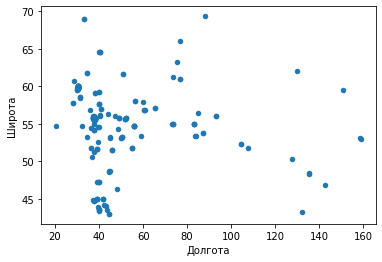

In [14]:
df1.plot('Долгота', 'Широта', marker = 'o', kind = 'scatter')

In [15]:
plt.show()

In [16]:
print(df1.columns)


Index(['id точки', 'Адрес', 'Долгота', 'Широта', 'Дата открытия',
       'Дата закрытия', 'Площадь магазина', 'Тип входа', 'Площадь ТЦ',
       'Формат магазина', 'Парковка', 'Этаж', 'Время работы',
       'Заполненность ТЦ', 'Рядом с эскалатором', 'Рядом со входом',
       'Конкуренты в ТЦ', 'Расположение в ТЦ', 'Толока', 'Люкс', 'Выборка'],
      dtype='object')


In [17]:
df1['Дата открытия'].dtype

dtype('<M8[ns]')

In [18]:
import datetime

In [19]:
df1['Дата открытия'] = pd.to_datetime(df1['Дата открытия'])

In [20]:
print(df1.loc[df1['Дата открытия'] > datetime.datetime.now()])

Empty DataFrame
Columns: [id точки, Адрес, Долгота, Широта, Дата открытия, Дата закрытия, Площадь магазина, Тип входа, Площадь ТЦ, Формат магазина, Парковка, Этаж, Время работы, Заполненность ТЦ, Рядом с эскалатором, Рядом со входом, Конкуренты в ТЦ, Расположение в ТЦ, Толока, Люкс, Выборка]
Index: []

[0 rows x 21 columns]


In [21]:
print(min(df1['Дата открытия']))

2001-05-07 00:00:00


In [22]:
df1.loc[df1['Дата открытия']  <= '2000-12-31']

,id точки,Адрес,Долгота,Широта,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,...,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка


In [23]:
df1.loc[df1['id точки']  == 42220,'Дата открытия']

194   2008-07-11
Name: Дата открытия, dtype: datetime64[ns]

In [24]:
min(df['Площадь магазина'])

91

In [25]:
max(df['Площадь магазина'])

1488

In [26]:
df['Тип входа'].unique()

array(['без сквозного прохода', 'сквозной проход',
       'отдельный вход с улицы + сквозной проход',
       'отдельный вход с улицы', 'единственный вход в ТК', nan],
      dtype=object)

In [27]:
min(df['Площадь ТЦ'])

700.0

In [28]:
max(df['Площадь ТЦ'])

396000.0

In [29]:
df1.loc[df['Площадь ТЦ']  == max(df['Площадь ТЦ'])]

,id точки,Адрес,Долгота,Широта,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,...,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
153,41856.0,"г. Москва, МКАД, 24-й километр 1, МТК ""Вегас""",37.724657,55.586797,2012-03-15,NaT,292,сквозной проход,396000.0,ТЦ,...,1,Вс-Чт c 10:00 до 23:00 Пт-Сб с 10:00...,3.0,0,1,1.0,6.0,56.088795,69.137931,Обучающая


In [30]:
df['Формат магазина'].unique()

array(['ТЦ', 'Мини ТЦ', 'Strееt', 'Мини-ТЦ', 'Street', 'Стрит', 'Стрт'],
      dtype=object)

In [31]:
df1.replace(to_replace = ['Street', 'Стрт', 'Стрит', 'Strееt'], value = 'Street', inplace = True)

In [32]:
df1.replace(to_replace = 'Мини ТЦ', value = 'Мини-ТЦ', inplace = True)

In [33]:
df1['Формат магазина'].unique()

array(['ТЦ', 'Мини-ТЦ', 'Street'], dtype=object)

In [34]:
df1['Парковка'].unique()

array(['бесплатная парковка', 'нет парковки', 'бесплатная паpковка', nan,
       'платная парковка', 1000, 700, 100], dtype=object)

In [35]:
df1.replace(to_replace = ['бесплатная парковка', 'бесплатная паpковка'], value = 'бесплатная парковка', inplace = True)

In [36]:
df1['Парковка'].unique()

array(['бесплатная парковка', 'нет парковки', nan, 'платная парковка',
       1000, 700, 100], dtype=object)

In [37]:
df1['Этаж'].unique()

array([1, 'цоколь', 3, 2, nan, 20, 6], dtype=object)

In [38]:
df1['Время работы'].unique()

array(['с 10:00 до 22:00', 'с 11:00 до 21:00', 'с 10:00 до 21:00',
       'с 10-00 до 22:00',
       'Вс-Чт с 10:00 до 22:00 Пт-Сб с 10:00 до 23:00',
       'Вс-Чт c 10:00 до 21:00           Пт-Сб с 10:00 до 22:00',
       'Пн-Сб с 10:00 до 21:00  Вс с 11:00 до 21:00', 'с 10:00 до 23:00',
       'пн-пт 10:30–19:30; сб 10:30–19:00; вс 11:00–18:00',
       'Пн-Пт с 9:00 до 20:00    Сб с 10:00 до 19:00         Вс с 10:00 до 18:00',
       'с 9:00 до 21:00', 'Пн-Сб с 10:00 до 21:00 Вс с 10:00 до 20:00',
       'c 9:00 до 21:00', 'Вс-Чт с 10:00 до 23:00 Пт-Сб с 10:00 до 24:00',
       'Вс-Чт c 10:00 до 23:00           Пт-Сб с 10:00 до 24:00',
       'с 9:00 до 23:00', 'с 10:00 до 22:00 ', 'круглосуточно',
       'Вс-Чт c 10:00 до 22:00           Пт-Сб с 10:00 до 23:00',
       'Вс-Чт с 10:00 до 22:00    Пт-Сб с 10:00 до 23:00',
       'c 10:00 до 24:00', '10:00–22:00',
       'Пн-Сб с 10:00 до 20:00 Вс с 10:00 до 19:00', nan,
       'Вс-Чт c 10:00 до 21:00    Пт-Сб с 10:00 до 22:00',
      

In [39]:
df1['Заполненность ТЦ'].unique()

array([ 3.,  2., nan,  1.,  0.])

In [40]:
df1['Выборка'].unique()

array(['Обучающая', 'Тестовая', '-', nan, 'Тест', 'Обyчающая'],
      dtype=object)

In [41]:
df1.replace(to_replace = ['Обучающая', 'Обyчающая'], value = 'Обучающая', inplace = True)

In [42]:
df1['Выборка'].unique()

array(['Обучающая', 'Тестовая', '-', nan, 'Тест'], dtype=object)

In [43]:
df1.replace(to_replace = ['Тестовая', 'Тест'], value = 'Тестовая', inplace = True)

In [44]:
df1['Выборка'].unique()

array(['Обучающая', 'Тестовая', '-', nan], dtype=object)

In [45]:
df3 = pd.read_excel('ООО_Внимание_к_деталям1.xlsx', sheet_name = 1)

In [46]:
df3.head()

,id точки,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,...,2018-01-01,2018-02-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01
0,11366.0,245709.342667,301024.685000,406199.782258,295602.853000,268179.172258,266579.009667,202667.039355,207347.022581,237393.216667,...,271084.023513,298845.267500,277776.347333,270902.919677,280106.099000,243448.836129,236709.816452,248268.778333,296637.103226,314456.870000
1,11810.0,270245.842066,297964.820199,406198.175918,232433.263996,229317.708387,251403.308057,242000.555806,260407.109247,267051.162996,...,245402.383180,273515.012143,240088.292000,196260.466452,228920.589000,204058.825161,207104.013135,203499.409840,206013.017419,218636.436000
2,15041.0,171972.976000,198141.440000,260215.741935,205316.010644,187059.870968,198590.970667,178250.637781,187094.699355,211000.005517,...,174154.623627,173190.240000,240396.837333,241494.616774,264873.765333,227461.233548,249503.230968,251805.680000,263152.960000,269913.018667
3,15775.0,409032.989736,468816.460949,582717.510920,442807.529886,371689.316054,428430.990000,365894.971255,384266.496739,385515.509997,...,431909.251500,493571.089286,408575.490000,387081.406452,418398.840000,362395.248387,393423.329032,387866.910000,421387.374194,481330.143000
4,16102.0,437693.191667,510077.198214,602107.617742,465779.798333,423448.914516,414476.575000,370944.770968,392089.754839,416797.330000,...,378429.858867,453511.489286,388849.670000,369223.219355,392389.013333,328593.246774,350885.291935,369367.358333,427575.006452,472508.001667


In [47]:
df4 = pd.melt(df3, id_vars = 'id точки', ignore_index=True)

In [48]:
print(df4.head())

   id точки    variable          value
0   11366.0  2015-01-01  245709.342667
1   11810.0  2015-01-01  270245.842066
2   15041.0  2015-01-01     171972.976
3   15775.0  2015-01-01  409032.989736
4   16102.0  2015-01-01  437693.191667


In [49]:
df4.loc[df4['id точки'] == 11366.0].count()

id точки    46
variable    46
value       46
dtype: int64

In [50]:
df4['value'] = pd.to_numeric(df4['value'],errors='ignore')

In [51]:
def is_pd_numeric(x):
    try:
        pd.to_numeric(x, errors="raise")
        return True
    except:
        return False

In [52]:
df4['valuen'] = df4['value'].map(is_pd_numeric)

In [53]:
print(df4[df4['valuen'] == False])

      id точки    variable         value  valuen
1555   16418.0  2015-11-01  1 260 110,78   False
1615   42238.0  2015-11-01    336 048.92   False
1770   42238.0  2015-12-01    705 402.96   False
1925   42238.0  2016-01-01    284 880.04   False
2064   42132.0  2016-02-01    565 006.39   False
2066   42151.0  2016-02-01  3 765 959,65   False
2219   42132.0  2016-03-01    740 025.32   False
2221   42151.0  2016-03-01  4 396 496,06   False
2225   42191.0  2016-03-01  2 070 484,72   False
2376   42151.0  2016-04-01  3 548 574,21   False
2380   42191.0  2016-04-01  1 622 718,72   False
2531   42151.0  2016-05-01  3 004 449,48   False
2535   42191.0  2016-05-01  1 704 226,37   False
3444   42019.0  2016-11-01    409 920,76   False
3599   42019.0  2016-12-01    731 540,48   False
3644   42355.0  2016-12-01    179 944.79   False
3754   42019.0  2017-01-01    359 273,61   False
3909   42019.0  2017-02-01    422 936,10   False


In [56]:
df4['value'].dtype

dtype('O')

In [80]:
df4.loc[df4['valuen'] == False,'value'] = df4[df4['valuen'] == False]['value'].str.replace(" ","")

In [84]:
df4.loc[df4['valuen'] == False,'value'] = df4[df4['valuen'] == False]['value'].str.replace(",",".")

In [85]:
print(df4[df4['valuen'] == False])

      id точки    variable       value  valuen
1555   16418.0  2015-11-01  1260110.78     0.0
1615   42238.0  2015-11-01   336048.92     0.0
1770   42238.0  2015-12-01   705402.96     0.0
1925   42238.0  2016-01-01   284880.04     0.0
2064   42132.0  2016-02-01   565006.39     0.0
2066   42151.0  2016-02-01  3765959.65     0.0
2219   42132.0  2016-03-01   740025.32     0.0
2221   42151.0  2016-03-01  4396496.06     0.0
2225   42191.0  2016-03-01  2070484.72     0.0
2376   42151.0  2016-04-01  3548574.21     0.0
2380   42191.0  2016-04-01  1622718.72     0.0
2531   42151.0  2016-05-01  3004449.48     0.0
2535   42191.0  2016-05-01  1704226.37     0.0
3444   42019.0  2016-11-01   409920.76     0.0
3599   42019.0  2016-12-01   731540.48     0.0
3644   42355.0  2016-12-01   179944.79     0.0
3754   42019.0  2017-01-01   359273.61     0.0
3909   42019.0  2017-02-01   422936.10     0.0


In [88]:
df4['value'] = pd.to_numeric(df4['value'], errors="raise")

In [90]:
df4['value'].max()

6251272.11628374

In [94]:
df4['value'].mean()

419255.36172128

In [93]:
df4['value'].min()

-647640.294

In [97]:
df4.loc[df4['value'] == df4['value'].max()]

,id точки,variable,value,valuen
3616,42151.0,2016-12-01,6.251272e+06,1.0


In [104]:
df4[(df4['value'] < 1000) & (df4['value'] > -1000)]

,id точки,variable,value,valuen
2149,42743.0,2016-02-01,0.0,1.0
2304,42743.0,2016-03-01,0.0,1.0
2459,42743.0,2016-04-01,0.0,1.0
2614,42743.0,2016-05-01,0.0,1.0
2769,42743.0,2016-06-01,0.0,1.0
2924,42743.0,2016-07-01,0.0,1.0
5175,42217.0,2017-10-01,1.0,1.0
5259,42826.0,2017-10-01,25.6,1.0
5330,42217.0,2017-11-01,1.0,1.0
5485,42217.0,2017-12-01,1.0,1.0


In [159]:
df1[(df1['Формат магазина'] == 'Street') & (df1['Выборка'] == 'Тестовая')]

,id точки,Адрес,Долгота,Широта,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,...,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
17,42345.0,"Ленинградская обл, г. Выборг, ул. Северная, до...",28.750976,60.711041,2006-06-01,NaT,150,отдельный вход с улицы,NaN,Street,...,3,с 10:00 до 21:00,NaN,0,1,NaN,NaN,22.997501,46.482759,Тестовая
37,42059.0,"г. Санкт-Петербург, Невский пр., дом № 27",30.327007,59.935056,2005-03-03,NaT,234,отдельный вход с улицы,NaN,Street,...,1,с 10:00 до 22:00,NaN,0,1,NaN,3.0,77.000192,77.965517,Тестовая
39,42072.0,"г. Санкт-Петербург, Невский пр., дом № 90-92, ...",30.352412,59.932428,2003-09-16,NaT,136,отдельный вход с улицы,NaN,Street,...,3,с 10:00 до 22:00,NaN,0,1,0.0,NaN,43.738228,74.862069,Тестовая
76,42466.0,"Новгородская обл, г. Великий Новгород, ул. Газ...",31.271550,58.524624,2011-04-14,NaT,375,отдельный вход с улицы,NaN,Street,...,3,с 10:00 до 21:00,NaN,0,1,NaN,NaN,21.730924,48.931034,Тестовая
201,42499.0,"Оренбургская обл, г. Оренбург, ул. Володарског...",55.102543,51.768377,2007-02-11,NaT,272,отдельный вход с улицы,NaN,Street,...,1,с 10:00 до 21:00,2.0,0,1,NaN,NaN,43.510475,68.620690,Тестовая
236,42792.0,"Ставропольский край, Пятигорск, улица Крайнего...",43.070993,44.036763,2015-11-11,NaT,429,без сквозного прохода,NaN,Street,...,1,с 10:00 до 21:00,NaN,0,0,NaN,NaN,39.937152,75.000000,Тестовая
240,42288.0,"Краснодарский край, г. Сочи, ул. Навагинская, ...",39.723699,43.587014,2002-04-06,NaT,172,отдельный вход с улицы,NaN,Street,...,1,с 9:00 до 21:00,NaN,0,1,0.0,NaN,30.012877,77.586207,Тестовая


In [113]:
df1[df1['Парковка'] == 'бесплатная парковка']

,id точки,Адрес,Долгота,Широта,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,...,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
0,42312.0,"Красноярский край, г. Норильск, пл. Металлурго...",88.182779,69.358932,2013-07-15,NaT,455,без сквозного прохода,28324.0,ТЦ,...,1,с 10:00 до 22:00,3.0,1,0,NaN,8.0,69.080723,70.931034,Обучающая
2,42447.0,"Мурманская обл, г. Мурманск, пр. Ленина, дом № 32",33.067489,68.956872,2012-11-09,NaT,602,без сквозного прохода,80000.0,ТЦ,...,1,с 10:00 до 22:00,3.0,1,1,NaN,10.0,91.103017,82.363636,Тестовая
3,2633929.0,"Ямало-Ненецкий АО, г. Новый Уренгой, ул. Сибир...",76.631279,66.082833,2014-08-01,NaT,326,без сквозного прохода,40000.0,ТЦ,...,1,с 10:00 до 22:00,3.0,1,1,NaN,10.0,36.219104,64.037037,Тестовая
4,15621.0,"Архангельская обл, г. Северодвинск, ул. Ломоно...",39.785522,64.550364,2003-11-09,NaT,178,сквозной проход,20000.0,ТЦ,...,1,с 10:00 до 21:00,3.0,0,0,0.0,8.0,82.880454,64.034483,Обучающая
5,15087.0,"Архангельская обл, г. Архангельск, ул. Воскрес...",40.535400,64.541900,2014-11-20,NaT,416,без сквозного прохода,60000.0,ТЦ,...,1,с 10:00 до 21:00,3.0,1,1,NaN,10.5,71.418989,67.035714,Тестовая
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,42278.0,"Краснодарский край, г. Сочи, п. Лазаревское, у...",39.335924,43.911720,2013-12-15,NaT,356,отдельный вход с улицы,3600.0,Мини-ТЦ,...,1,c 10-00 до 21-00,2.0,0,0,NaN,6.0,12.396310,48.689655,Обучающая
238,42298.0,"Краснодарский край, г. Сочи, ул. Новая Заря, д...",39.732367,43.606535,2011-11-23,NaT,321,без сквозного прохода,167680.0,ТЦ,...,1,с 10:00 до 22:00,3.0,0,0,1.0,5.0,113.213531,79.137931,Обучающая
241,42553.0,"Респ. Кабардино-Балкария, г. Нальчик, ул. Лени...",43.608527,43.485108,2009-05-15,NaT,218,без сквозного прохода,4848.0,ТЦ,...,1,с 10:00 до 21:00,NaN,0,1,NaN,5.0,103.695752,73.379310,Обучающая
243,42525.0,"Приморский край, Владивосток г, Полетаева ул, ...",131.951234,43.212639,2018-06-16,NaT,527,без сквозного прохода,94000.0,ТЦ,...,1,Вс-Чт с 10:00 до 21:00 Пт-Сб с 10:00 до 2...,2.0,1,0,NaN,3.0,29.635210,74.000000,Тестовая


In [111]:
df1['Формат магазина'].unique()

array(['ТЦ', 'Мини-ТЦ', 'Street'], dtype=object)

In [116]:
df1[df1['Формат магазина'] == 'Мини-ТЦ'].count()

id точки               30
Адрес                  31
Долгота                31
Широта                 31
Дата открытия          31
Дата закрытия           2
Площадь магазина       31
Тип входа              31
Площадь ТЦ             22
Формат магазина        31
Парковка               31
Этаж                   30
Время работы           31
Заполненность ТЦ       19
Рядом с эскалатором    31
Рядом со входом        31
Конкуренты в ТЦ         3
Расположение в ТЦ      31
Толока                 31
Люкс                   31
Выборка                31
dtype: int64

In [147]:
df6 = df1[df1['Формат магазина'] == 'Мини-ТЦ'].dropna(subset = ['id точки'])

In [157]:
df6['Выборка'].unique()

array(['Обучающая', 'Тестовая', '-'], dtype=object)

In [158]:
df6[df6['Выборка'] == 'Обучающая'].count()

id точки               21
Адрес                  21
Долгота                21
Широта                 21
Дата открытия          21
Дата закрытия           0
Площадь магазина       21
Тип входа              21
Площадь ТЦ             16
Формат магазина        21
Парковка               21
Этаж                   20
Время работы           21
Заполненность ТЦ       14
Рядом с эскалатором    21
Рядом со входом        21
Конкуренты в ТЦ         2
Расположение в ТЦ      21
Толока                 21
Люкс                   21
Выборка                21
dtype: int64

In [123]:
df4['variable'] = pd.to_datetime(df4['variable'])

In [163]:
df4[df4['variable'].dt.year == 2016.]

,id точки,variable,value,valuen
1860,11366.0,2016-01-01,219926.676667,1.0
1861,11810.0,2016-01-01,246497.576000,1.0
1862,15041.0,2016-01-01,179593.269333,1.0
1863,15775.0,2016-01-01,401977.169997,1.0
1864,16102.0,2016-01-01,399725.448333,1.0
...,...,...,...,...
3715,2634000.0,2016-12-01,979096.869055,1.0
3716,2634008.0,2016-12-01,527792.670071,1.0
3717,2634011.0,2016-12-01,838820.486090,1.0
3718,2633936.0,2016-12-01,644241.254774,1.0


In [164]:
df4['variable'].dt.year.unique()

array([2015., 2016., 2017., 2018.,   nan])

In [167]:
df5 = df6[(df6['Формат магазина'] == 'Мини-ТЦ') & (df6['Выборка'] == 'Обучающая')].merge(df4[df4['variable'].dt.year == 2016.], how = 'inner', left_on = 'id точки', right_on = 'id точки')

In [170]:
df7 = df6[df6['Формат магазина'] == 'Мини-ТЦ'].merge(df4[df4['variable'].dt.year == 2016.], how = 'inner', left_on = 'id точки', right_on = 'id точки')

In [171]:
df5.groupby('id точки')['id точки'].unique().count()

11

In [172]:
df7.groupby('id точки')['id точки'].unique().count()

19

In [175]:
df7.loc[~df7['id точки'].isin(df5['id точки']),'id точки' ].unique()

array([42067., 42192., 42355., 42368., 42803., 42383., 42422., 42548.])

In [169]:
df1[~df1['id точки'].isin(df5['id точки'])]

,id точки,Адрес,Долгота,Широта,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,...,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
0,42312.0,"Красноярский край, г. Норильск, пл. Металлурго...",88.182779,69.358932,2013-07-15,NaT,455,без сквозного прохода,28324.0,ТЦ,...,1,с 10:00 до 22:00,3.0,1,0,NaN,8.0,69.080723,70.931034,Обучающая
2,42447.0,"Мурманская обл, г. Мурманск, пр. Ленина, дом № 32",33.067489,68.956872,2012-11-09,NaT,602,без сквозного прохода,80000.0,ТЦ,...,1,с 10:00 до 22:00,3.0,1,1,NaN,10.0,91.103017,82.363636,Тестовая
3,2633929.0,"Ямало-Ненецкий АО, г. Новый Уренгой, ул. Сибир...",76.631279,66.082833,2014-08-01,NaT,326,без сквозного прохода,40000.0,ТЦ,...,1,с 10:00 до 22:00,3.0,1,1,NaN,10.0,36.219104,64.037037,Тестовая
4,15621.0,"Архангельская обл, г. Северодвинск, ул. Ломоно...",39.785522,64.550364,2003-11-09,NaT,178,сквозной проход,20000.0,ТЦ,...,1,с 10:00 до 21:00,3.0,0,0,0.0,8.0,82.880454,64.034483,Обучающая
5,15087.0,"Архангельская обл, г. Архангельск, ул. Воскрес...",40.535400,64.541900,2014-11-20,NaT,416,без сквозного прохода,60000.0,ТЦ,...,1,с 10:00 до 21:00,3.0,1,1,NaN,10.5,71.418989,67.035714,Тестовая
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,42553.0,"Респ. Кабардино-Балкария, г. Нальчик, ул. Лени...",43.608527,43.485108,2009-05-15,NaT,218,без сквозного прохода,4848.0,ТЦ,...,1,с 10:00 до 21:00,NaN,0,1,NaN,5.0,103.695752,73.379310,Обучающая
242,42240.0,"Краснодарский край, Адлерский р-он, г. Сочи, у...",39.926853,43.427665,2011-10-05,NaT,292,без сквозного прохода,30000.0,ТЦ,...,3,с 10:00 до 21:00,3.0,1,1,NaN,10.0,86.215068,71.655172,Тестовая
243,42525.0,"Приморский край, Владивосток г, Полетаева ул, ...",131.951234,43.212639,2018-06-16,NaT,527,без сквозного прохода,94000.0,ТЦ,...,1,Вс-Чт с 10:00 до 21:00 Пт-Сб с 10:00 до 2...,2.0,1,0,NaN,3.0,29.635210,74.000000,Тестовая
244,42668.0,"Республика Северная Осетия — Алания, Владикавк...",44.642685,43.033586,2015-12-21,NaT,313,без сквозного прохода,28000.0,ТЦ,...,1,с 10:00 до 22:00,2.0,0,0,NaN,4.0,17.597540,49.727273,Тестовая


In [177]:
df5['value'].mean()

283827.3012077455

In [178]:
df7['value'].mean()

331897.9179190701